In [1]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\rvrma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
#Loading movies dataset into the datafreame
movie_df = pd.read_csv("C:/Users/rvrma/Documents/3rd semester/Massive Data Mining/project/movies.csv")
movie_df.set_index('movieId')
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children|Comedy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# code to create a genres dataframe 
genres_df = pd.DataFrame()
# finding all genres of each movie and creating genres dictionary
for index, r in movie_df.iterrows():
    genre_dict = {  "movieId": r['movieId'],
                    "title": r['title'],
                    "Action": False,
                    "Adventure": False,
                    "Animation": False,
                    "Children": False,
                    "Comedy": False,
                    "Crime": False,
                    "Documentary": False,
                    "Drama": False,
                    "Fantasy": False,
                    "Film-Noir": False,
                    "Horror": False,
                    "Musical": False,
                    "Mystery": False,
                    "Romance": False,
                    "Sci-Fi": False,
                    "Thriller": False,
                    "War": False,
                    "Western": False }
    
    genres = r['genres'].split("|")
    if "(no genres listed)" not in genres:
        for gen in genres:
            genre_dict[gen] = True
    # appending dictionary values of each row to genres dataframe
    genres_df = genres_df.append(genre_dict, ignore_index=True)

In [4]:
# loading ratings datset into a dataframe
rat_df = pd.read_csv("C:/Users/rvrma/Documents/3rd semester/Massive Data Mining/project/ml-1m/ratings.csv")
# fixing indexes i.e, userId, movieId
rat_df.set_index(['userId', 'movieId'])
rat_df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# Now adding ratings dataframe and movie genres dataframe into a single dataframe
full_df = rat_df.merge(genres_df,  on='movieId')
full_df.head()

,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
0,1,1193,5,978300760,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)
1,2,1193,5,978298413,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)
2,12,1193,4,978220179,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)
3,15,1193,4,978199279,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)
4,17,1193,5,978158471,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)


In [6]:
print("Preview of the data:\n\n")
print("Shape of the datset is:")
display(full_df.shape)
print("Combined dataset is:")
display(full_df.head())
print('\n\n')
print("Information about the columns and datframe:")
print(full_df.info())

Preview of the data:


Shape of the datset is:


(1000209, 23)

Combined dataset is:


,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
0,1,1193,5,978300760,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)
1,2,1193,5,978298413,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)
2,12,1193,4,978220179,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)
3,15,1193,4,978199279,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)
4,17,1193,5,978158471,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,One Flew Over the Cuckoo's Nest (1975)





Information about the columns and datframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 23 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   userId       1000209 non-null  int64  
 1   movieId      1000209 non-null  int64  
 2   rating       1000209 non-null  int64  
 3   timestamp    1000209 non-null  int64  
 4   Action       1000209 non-null  float64
 5   Adventure    1000209 non-null  float64
 6   Animation    1000209 non-null  float64
 7   Children     1000209 non-null  float64
 8   Comedy       1000209 non-null  float64
 9   Crime        1000209 non-null  float64
 10  Documentary  1000209 non-null  float64
 11  Drama        1000209 non-null  float64
 12  Fantasy      1000209 non-null  float64
 13  Film-Noir    1000209 non-null  float64
 14  Horror       1000209 non-null  float64
 15  Musical      1000209 non-null  float64
 16  Mystery      1000209 non-null  float64
 17 

Displaying missing values in the dataset using heatmap if there are any:-


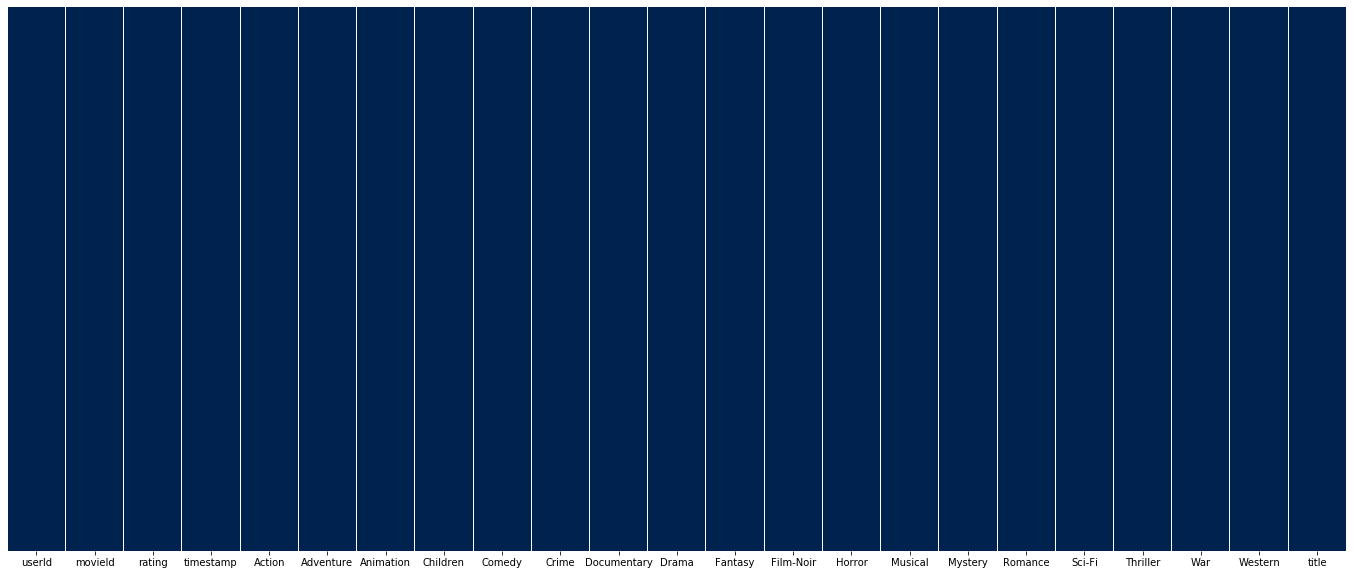

In [7]:
# code for showing missing values using heatmap
print("Displaying missing values in the dataset using heatmap if there are any:-")
plt.figure(figsize=(24,10))
sns.heatmap(full_df.isnull(), cbar=False, yticklabels=False, cmap='cividis')

**Above heatmap shows no missing values in the dataset**

In [9]:
# code to check for categorical data
print("Displaying categorical or non-numeric data:-\n")
print(full_df.select_dtypes(include=['object', 'category']))
print("\nUnique count of non-numeric data\n")
print(full_df.select_dtypes(include=['object', 'category']).nunique())

Displaying categorical or non-numeric data:-

                                               title
0             One Flew Over the Cuckoo's Nest (1975)
1             One Flew Over the Cuckoo's Nest (1975)
2             One Flew Over the Cuckoo's Nest (1975)
3             One Flew Over the Cuckoo's Nest (1975)
4             One Flew Over the Cuckoo's Nest (1975)
...                                              ...
1000204                           Modulations (1998)
1000205                        Broken Vessels (1998)
1000206                            White Boys (1999)
1000207                     One Little Indian (1973)
1000208  Five Wives, Three Secretaries and Me (1998)

[1000209 rows x 1 columns]

Unique count of non-numeric data

title    3706
dtype: int64


In [10]:
print('Description of the data i.e, statistically:-')
display(full_df.describe().T)

Description of the data i.e, statistically:-


,count,mean,std,min,25%,50%,75%,max
userId,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
movieId,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09
Action,1000209.0,2.574032e-01,4.372036e-01,0.0,0.0,0.0,1.0,1.000000e+00
Adventure,1000209.0,1.339250e-01,3.405719e-01,0.0,0.0,0.0,0.0,1.000000e+00
Animation,1000209.0,4.328395e-02,2.034957e-01,0.0,0.0,0.0,0.0,1.000000e+00
Children,1000209.0,7.217092e-02,2.587708e-01,0.0,0.0,0.0,0.0,1.000000e+00
Comedy,1000209.0,3.565055e-01,4.789672e-01,0.0,0.0,0.0,1.0,1.000000e+00
Crime,1000209.0,7.952438e-02,2.705556e-01,0.0,0.0,0.0,0.0,1.000000e+00


(22.0, 0)

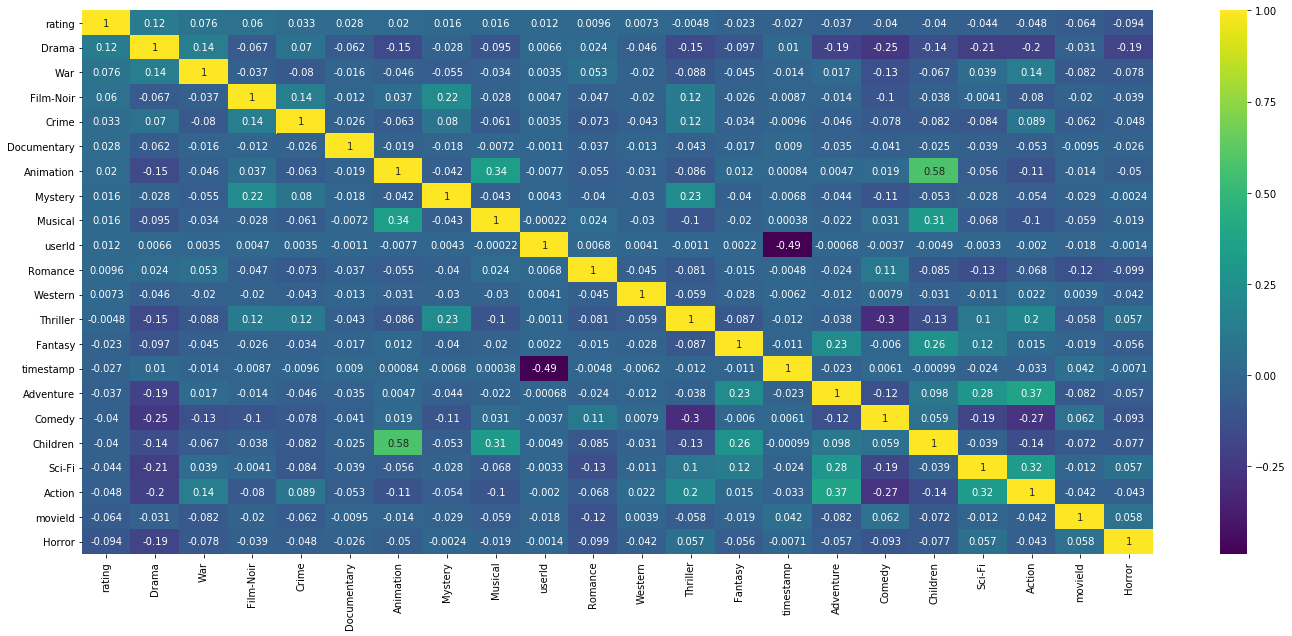

In [12]:
#Quality correlation matrix
dimen = 24 
df = full_df.corr(method ='pearson')
column = df.nlargest(dimen, 'rating')['rating'].index
corr_m = full_df[column].corr()
plt.figure(figsize=(24,10))
ax=sns.heatmap(corr_m, annot=True, cmap = 'viridis')
ax.get_ylim()
ax.set_ylim(22.0, 0)

**Above heatmap shows the correaltion between different columns i.e, features of the datset**

In [13]:
# function for box plot
def plot_box(l,r_1,c_1):
    for i in range(0,len(l)):
        plt.subplot( r_1, c_1, i+1)
        sns.set_style('whitegrid')
        sns.boxplot(full_df[l[i]],color='blue',orient='v')
        plt.tight_layout()

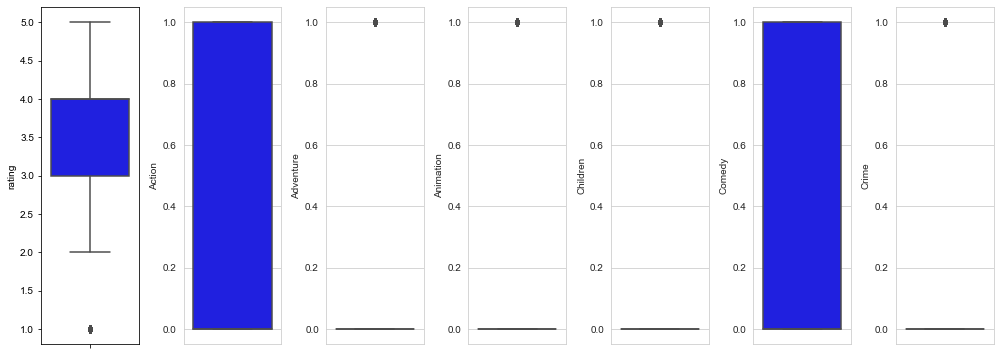

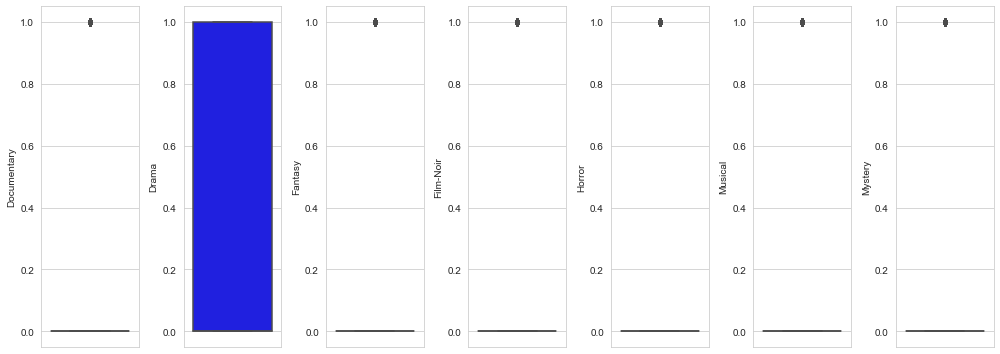

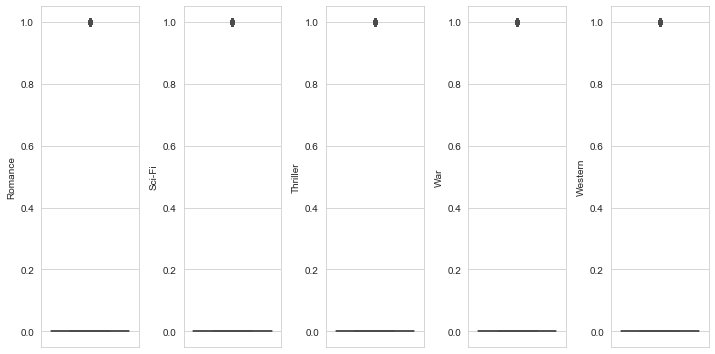

In [14]:
# code for boxplots
le = full_df.columns.values[2:10]
#print(le)
ind = np.in1d(le, 'timestamp').nonzero()[0]
le = np.delete(le, ind)

no_cols = le.size
no_rows = len(le) - 1 / (no_cols)

row = no_rows * 5
col=no_cols * 2
r = no_rows + 1
c = no_cols

plt.figure(figsize = ( col, row ))
plot_box(le,r,c)

le = full_df.columns.values[10:17]
plt.figure(figsize = ( col, row ))
plot_box(le,r,c)

le = full_df.columns.values[17:] 
ind = np.in1d(le, 'title').nonzero()[0]
le = np.delete(le, ind)
plt.figure(figsize = (col, row))
plot_box(le,r,c)

# userId and timestamp do not have any outliers

In [15]:
# function for dist plot
def dist_plot(l,r_1,c_1):
    for i in range(0,len(l)):
        plt.subplot( r_1, c_1, i+1)
        sns.distplot(full_df[l[i]],kde=True)

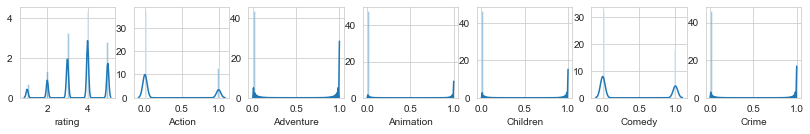

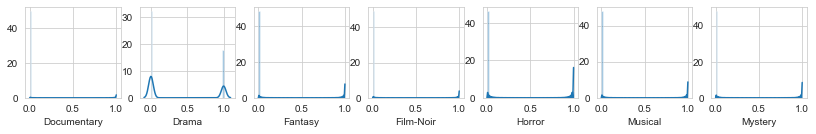

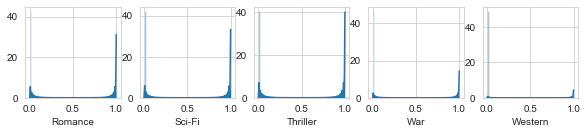

In [18]:
# code to depict variations in the data
le = full_df.select_dtypes(include=np.number).columns[2:10]
ind = np.in1d(le, 'timestamp').nonzero()[0]
le = np.delete(le, ind)

no_cols = le.size
no_rows = len(le)-1 / no_cols

row = no_rows * 2
col = no_cols * 2
r = no_rows + 1
c = no_cols

plt.figure(figsize = (col,row))
dist_plot(le,r,c)
    
le = full_df.columns.values[10:17] 
plt.figure(figsize = (col,row))
dist_plot(le,r,c)

le = full_df.select_dtypes(include=np.number).columns[17:]
plt.figure(figsize = (col,row))
dist_plot(le,r,c)


**We can observe that none of the columns are normally distributed and all the variables are independent and positively skewed**